In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [3]:
file_path = "../data_set/diamonds.csv"
Diamonds = pd.read_csv(file_path)

dict = {
    "info": Diamonds.info(),
    "head": Diamonds.head(10),
    "dec": Diamonds.describe(include='all'),
    "col": Diamonds.columns,
    "index": Diamonds.index
}
dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


{'info': None,
 'head':    carat        cut color clarity  depth  table  price     x     y     z
 0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
 5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
 6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
 7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
 8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
 9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39,
 'dec':                carat    cut  color clarity         depth         table  \
 count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
 uniq

C:\Users\Kevin\AppData\Local\Temp\ipykernel_19112\3890346537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carat', y='price', data=Diamonds, hue=None , palette='viridis')


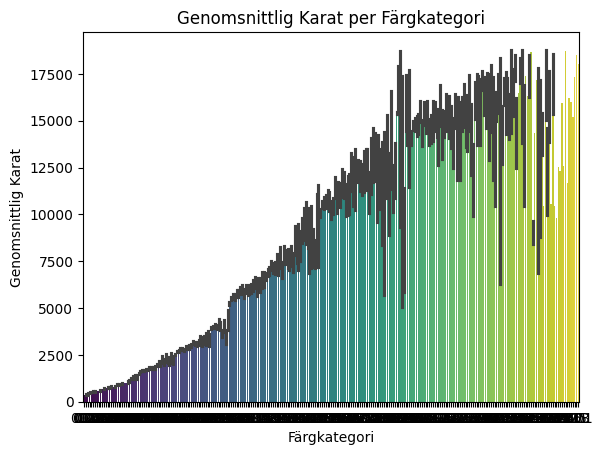

In [4]:
sns.barplot(x='carat', y='price', data=Diamonds, hue=None , palette='viridis')
plt.title('Genomsnittlig Karat per Färgkategori')
plt.xlabel('Färgkategori')
plt.ylabel('Genomsnittlig Karat')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

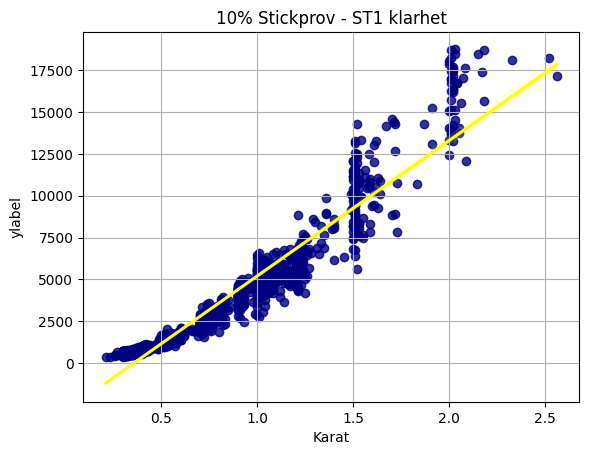

In [5]:
clarity_categories = Diamonds['clarity'].unique()

percent_sample = pd.DataFrame()


for clarity in clarity_categories:
    subset = Diamonds[Diamonds['clarity'] == clarity]
    sample_size = int(len(subset) * 0.1)
    percent_sample_subset = subset.sample(n=sample_size, random_state=72)
    percent_sample = pd.concat([percent_sample, percent_sample_subset])

sns.regplot(x='carat', y='price', data=percent_sample[percent_sample['clarity'] == 'SI1'], ci=95, line_kws={'color': 'yellow'}, scatter_kws={'color': 'navy'})
plt.title('10% Stickprov - ST1 klarhet')
plt.grid()
plt.xlabel('Karat')
plt.ylabel('ylabel')

plt.show


In [6]:
selceted_clarity = 'SI1'
selected_data = Diamonds[Diamonds['clarity'] == selceted_clarity]


number_of_points = len(selected_data) * 0.1
print(f"10% of the Diamonds in SI1 category: {number_of_points:.2f}")

10% of the Diamonds in SI1 category: 1306.50


In [7]:
selceted_clarity = 'I1'
selected_data = Diamonds[Diamonds['clarity'] == selceted_clarity]


number_of_points = len(selected_data) * 0.1
print(f"10% of the Diamonds in I1 category: {number_of_points:.2f}")

10% of the Diamonds in I1 category: 74.10


In [8]:
# Gruppera datan efter karat och klarhet och beräkna genomsnitt och standardavvikelse för pris
stats = Diamonds.groupby(['clarity', 'carat']).price.agg(['mean', 'std']).reset_index()

stats = stats.dropna(subset=['std'])

# Skapa separata tabeller för varje klarhet
for clarity in Diamonds['clarity'].unique():
    clarity_table = stats[stats['clarity'] == clarity].pivot(index='carat', columns='clarity', values=['mean', 'std'])
    print(f"Klarhet: {clarity}")
    print(clarity_table)
    print("\n")

Klarhet: SI2
                 mean          std
clarity           SI2          SI2
carat                             
0.23       387.500000    86.974134
0.25      1128.333333    99.881597
0.29       535.000000   154.243314
0.30       461.194915    68.397313
0.31       486.868132    74.306753
...               ...          ...
2.74     17174.000000    14.142136
2.80     16909.000000  2657.307284
3.00     16286.000000  1184.722752
3.01     17748.000000  1459.048320
3.04     16956.500000  2266.277234

[225 rows x 2 columns]


Klarhet: SI1
                 mean          std
clarity           SI1          SI1
carat                             
0.22       406.000000    90.509668
0.23       367.666667     6.350853
0.24       445.000000    80.403980
0.25       404.857143    35.662439
0.26       435.214286    87.655952
...               ...          ...
2.48     17304.000000   832.971788
2.51     16539.333333  1095.810811
2.52     17741.500000   721.956024
2.53     17481.500000  1092.479977
2.5

In [9]:
max_stats = Diamonds.groupby(['clarity', 'carat']).price.max().reset_index()

for clarity in Diamonds['clarity'].unique():
    clarity_max_table = max_stats[max_stats['clarity'] == clarity].pivot(index='carat', columns='clarity', values='price')
    print(f"klarhet: {clarity}")
    print(clarity_max_table)
    print("\n")

klarhet: SI2
clarity    SI2
carat         
0.20       345
0.21       394
0.23       449
0.25      1186
0.26       362
...        ...
2.75     15415
2.80     18788
3.00     16970
3.01     18710
3.04     18559

[246 rows x 1 columns]


klarhet: SI1
clarity    SI1
carat         
0.21       326
0.22       470
0.23       375
0.24       571
0.25       452
...        ...
2.51     17452
2.52     18252
2.53     18254
2.56     17753
2.57     18485

[222 rows x 1 columns]


klarhet: VS1
clarity    VS1
carat         
0.23       611
0.24       687
0.25       595
0.26       618
0.27       704
...        ...
2.39     17920
2.41     15320
2.42     17262
2.55     18766
2.59     16465

[191 rows x 1 columns]


klarhet: VS2
clarity    VS2
carat         
0.20       367
0.21       386
0.22       404
0.23       577
0.24       536
...        ...
2.45     18113
2.48     16820
2.50     18325
2.51     18020
3.51     18701

[213 rows x 1 columns]


klarhet: VVS2
clarity   VVS2
carat         
0.23       688
0.24 

In [10]:

max_price_per_carat = max_stats.sort_values(by=['carat', 'clarity'], ascending=[True, False])

max_price_per_carat = max_price_per_carat.drop_duplicates(subset='carat')

clarity_counts = max_price_per_carat['clarity'].value_counts()

print("Dyraste diamanten för varje karatvärde:")
print(max_price_per_carat)

Dyraste diamanten för varje karatvärde:
     clarity  carat  price
939      VS2   0.20    367
940      VS2   0.21    386
941      VS2   0.22    404
1282    VVS2   0.23    688
1283    VVS2   0.24    678
...      ...    ...    ...
160       I1   4.00  15984
161       I1   4.01  15223
162       I1   4.13  17329
163       I1   4.50  18531
164       I1   5.01  18018

[273 rows x 3 columns]


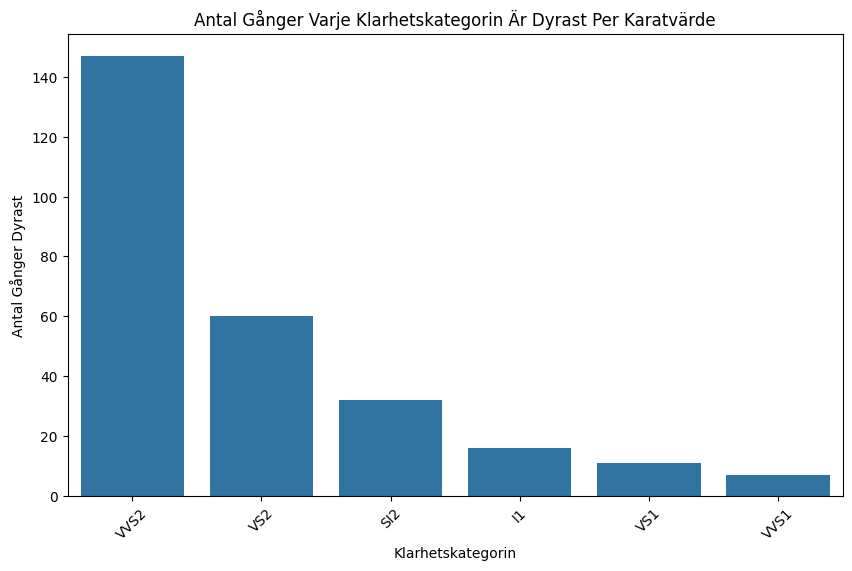

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clarity_counts.index, y=clarity_counts.values)
plt.title('Antal Gånger Varje Klarhetskategorin Är Dyrast Per Karatvärde')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Antal Gånger Dyrast')
plt.xticks(rotation=45)
plt.show()

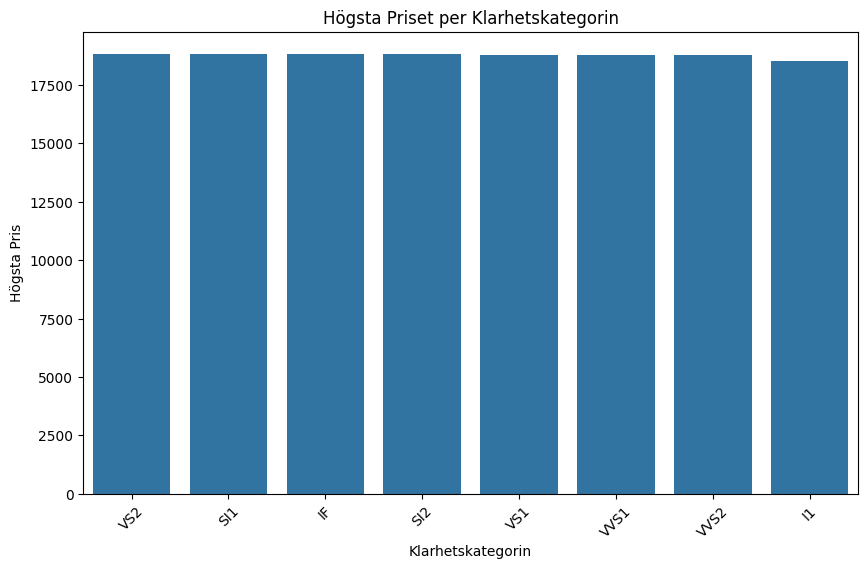

In [12]:
max_price_per_clarity = Diamonds.groupby('clarity')['price'].max().reset_index()
max_price_per_clarity = max_price_per_clarity.sort_values(by='price', ascending=False)

# Skapa ett stapeldiagram
plt.figure(figsize=(10, 6))
sns.barplot(x='clarity', y='price', data=max_price_per_clarity)
plt.title('Högsta Priset per Klarhetskategorin')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Högsta Pris')
plt.xticks(rotation=45)
plt.show()

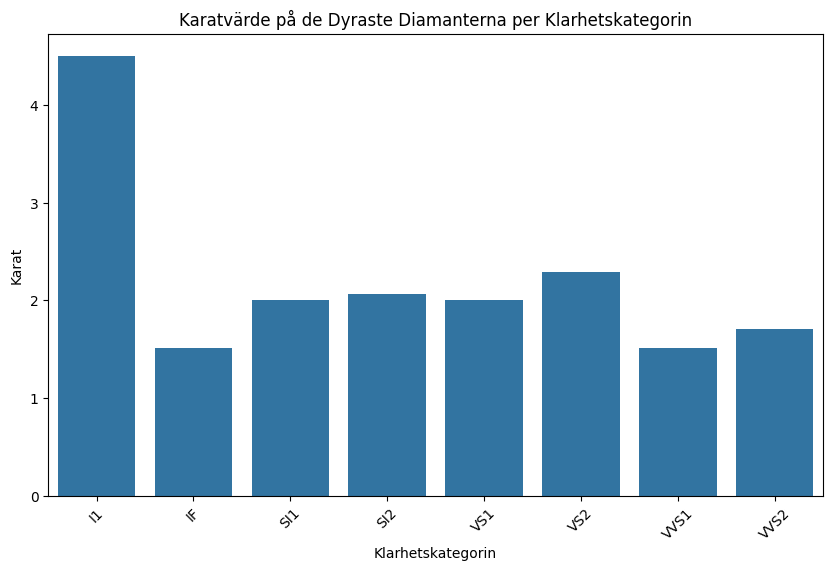

In [13]:
max_price_diamonds = Diamonds.loc[Diamonds.groupby('clarity')['price'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='clarity', y='carat', data=max_price_diamonds)
plt.title('Karatvärde på de Dyraste Diamanterna per Klarhetskategorin')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Karat')
plt.xticks(rotation=45)
plt.show()

             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  


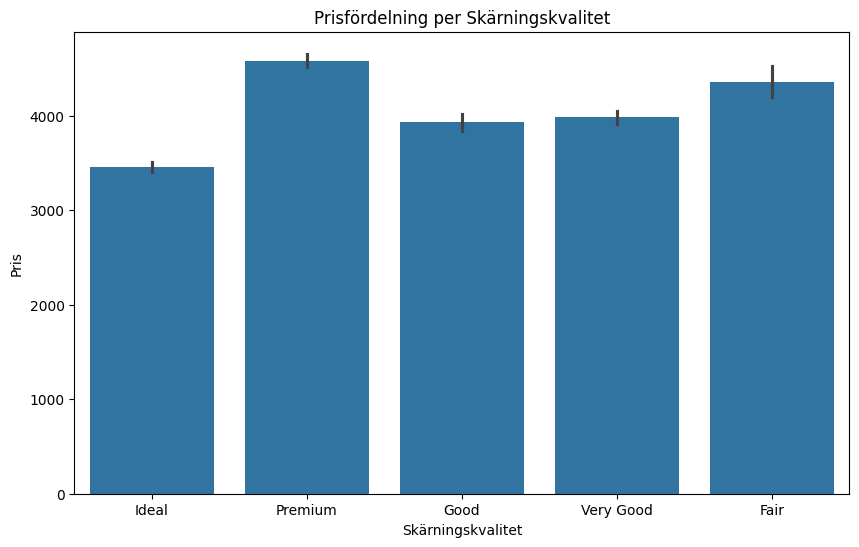

In [14]:
price_stats_by_cut = Diamonds.groupby('cut')['price']. describe()


print(price_stats_by_cut)

plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='price', data=Diamonds)
plt.title('Prisfördelning per Skärningskvalitet')
plt.xlabel('Skärningskvalitet')
plt.ylabel('Pris')
plt.show()

In [15]:
f_value, p_value = stats.f_oneway(*[Diamonds[Diamonds['clarity'] == clarity]['price'] for clarity in Diamonds['clarity'].unique()])

print(f"F-värde: {f_value}, p-värde: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Avvisar nollhypotesen: Det finns en signigikant skilland i Medelpriset mellan klarhetskategorier")
else:
    print("Avvisar inte nollhypotesen: ingen signifikant skillnad i medelpriset mellan klarhetskategorier.")

AttributeError: 'DataFrame' object has no attribute 'f_oneway'

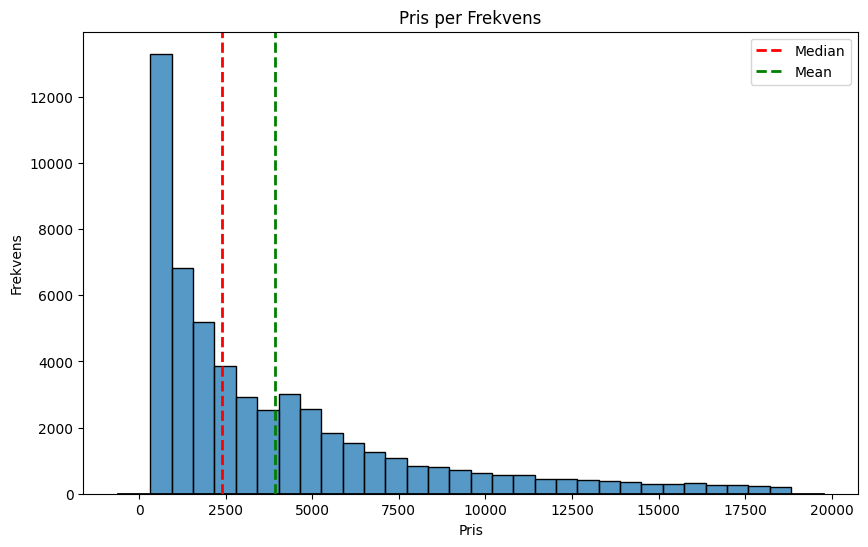

In [20]:
# Välj en kolumn, till exempel 'price'
data = Diamonds['price']

median_price = np.median(data)
mean_price = np.mean(data)

# Skapa histogrammet
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, bins=30)

# Räkna ut medelvärdet och standardavvikelsen för datan
mu, std = norm.fit(data)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Pris per Frekvens"
plt.title(title)
plt.axvline(median_price, color='red', linestyle='dashed', linewidth=2, label='Median'.format(median_price))
plt.axvline(mean_price, color='green', linestyle='dashed', linewidth=2, label='Mean'.format(mean_price))
plt.legend()

plt.xlabel('Pris')
plt.ylabel('Frekvens')
plt.show()

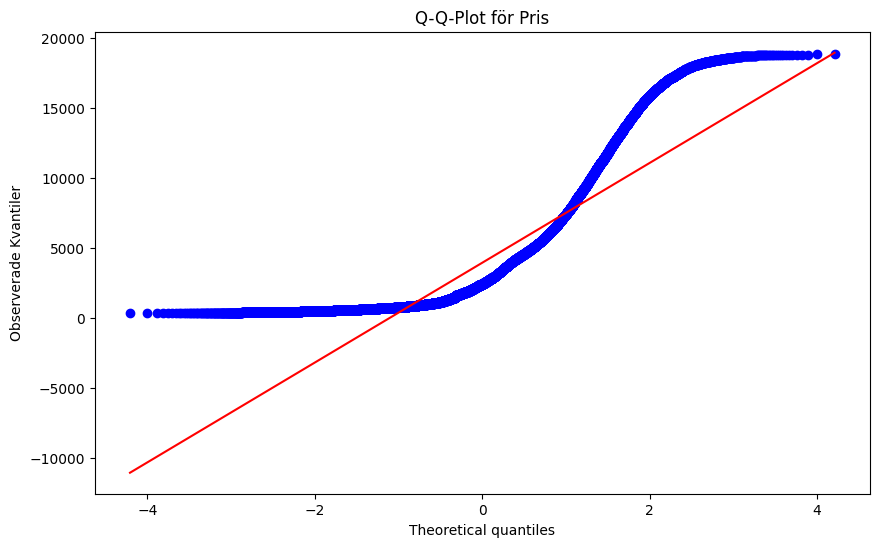

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q-Plot för Pris')
plt.ylabel('Observerade Kvantiler')
plt.show()

In [ ]:
median_price = Diamonds['price'].median()

# Beräkna kvartilerna för priserna
Q1 = Diamonds['price'].quantile(0.25)
Q3 = Diamonds['price'].quantile(0.75)

# Beräkna interkvartilomfånget (IQR) för priserna
IQR = Q3 - Q1

# Skriv ut resultaten
print(f"Medianpris: {median_price}")
print(f"Första kvartilen (25:e percentilen): {Q1}")
print(f"Tredje kvartilen (75:e percentilen): {Q3}")
print(f"Interkvartilomfånget (IQR): {IQR}")

Medianpris: 2401.0
Första kvartilen (25:e percentilen): 950.0
Tredje kvartilen (75:e percentilen): 5324.25
Interkvartilomfånget (IQR): 4374.25


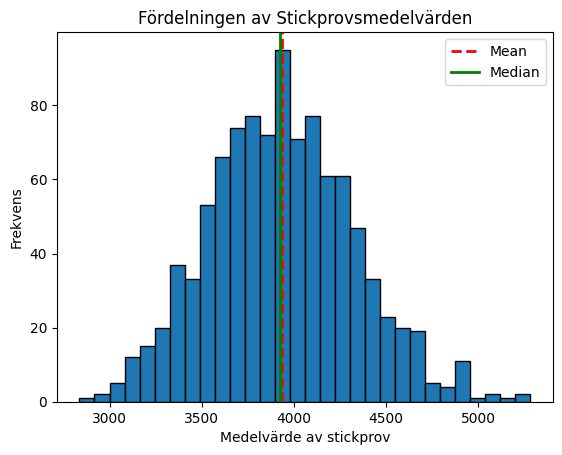

In [29]:
n_samples = 1000
sample_size = 100

# Dra stickprov och beräkna medelvärdena
sample_means = [Diamonds['price'].sample(sample_size).mean() for _ in range(n_samples)]

mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)

# Plotta resultatet
plt.hist(sample_means, bins=30, edgecolor='black')
plt.axvline(mean_of_sample_means, color='red', linestyle='dashed', linewidth=2, label='Mean'.format(mean_of_sample_means))
plt.axvline(median_of_sample_means, color='green', linestyle='solid', linewidth=2, label='Median'.format(median_of_sample_means))
plt.legend()
plt.xlabel('Medelvärde av stickprov')
plt.ylabel('Frekvens')
plt.title('Fördelningen av Stickprovsmedelvärden')
plt.show()